In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=c8f4c8302ce14ab4fd2e87fad68294bfb4907075845f807b9927024741d00e17
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving car_evaluation_0.csv to car_evaluation_0 (1).csv
Saving car_evaluation_1.csv to car_evaluation_1.csv
Saving car_evaluation_2.csv to car_evaluation_2.csv
Saving car_evaluation_3.csv to car_evaluation_3.csv
Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')
[0 1 2 3]
Misclassified samples: 65
Accuracy: 0.87


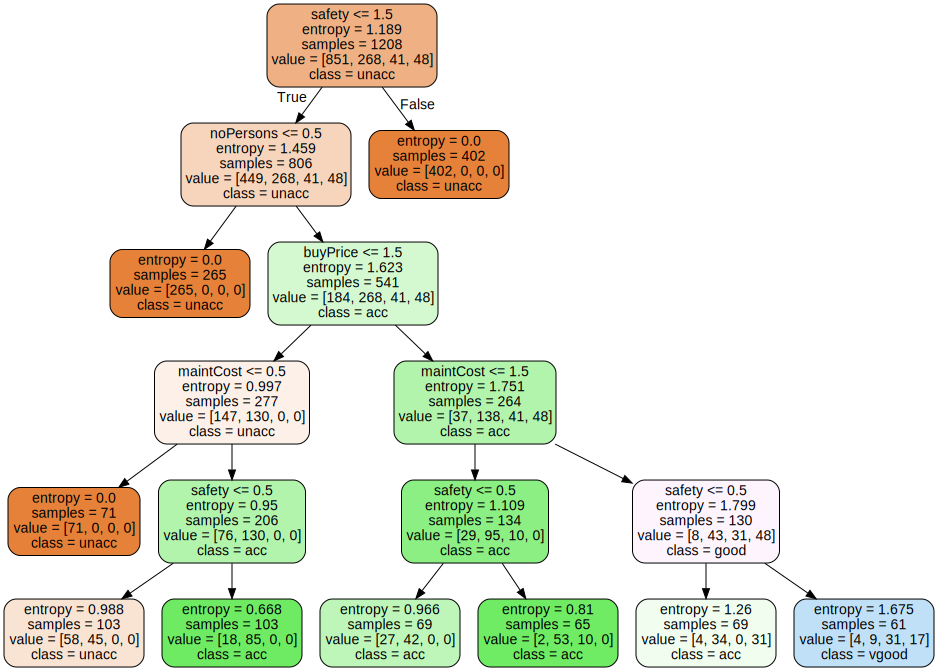

In [3]:
!pip install graphviz

#Import libraries 
from pyspark.sql import SparkSession
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint

import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics

import shutil
from google.colab import files

# Uploading the seperate four csv files
uploaded_files = files.upload()

# First CSV file is loaded in dataframe
df1 = pd.read_csv('car_evaluation_0.csv')

# Second CSV file is loaded in dataframe
df2 = pd.read_csv('car_evaluation_1.csv')

# Third CSV file is loaded in dataframe
df3 = pd.read_csv('car_evaluation_2.csv')

# Fourth CSV file is loaded in dataframe
df4 = pd.read_csv('car_evaluation_3.csv')

# Concatenate the four CSV files dataframes in one
concatenated_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Save the concatenated dataframe as a new CSV file
concatenated_df.to_csv('concatenated.csv', index=False)

data = pd.read_csv('concatenated.csv')
data['decision'], decision_names = pd.factorize(data['decision'])
print(decision_names)
print(data['decision'].unique())
data['buyPrice'],_ = pd.factorize(data['buyPrice'])
data['maintCost'],_ = pd.factorize(data['maintCost'])
data['noDoors'],_ = pd.factorize(data['noDoors'])
data['noPersons'],_ = pd.factorize(data['noPersons'])
data['bootLuggage'],_ = pd.factorize(data['bootLuggage'])
data['safety'],_ = pd.factorize(data['safety'])
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dtree.fit(X_train, y_train)

# Making predictions using the test data 
y_pred = dtree.predict(X_test)

# Accuracy of the algorithm to be calculated and printed
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# Convert the given data into a graph 
import graphviz

feature_names = X.columns
class_names = decision_names

dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True, feature_names=feature_names, class_names=class_names)
graph = graphviz.Source(dot_data)  
graph


In [4]:
#Library for numerical computation
import numpy as np 

#Library for data manipulation and analysis 
import pandas as pd 

#Library for plotting graphs and charts 
import matplotlib.pyplot as plt 

#Library for advanced data visualisation 
import seaborn as sns 

#command for visualisation 
%matplotlib inline

In [5]:
#Library to give warnings
import warnings

warnings.filterwarnings('ignore')

In [6]:
#Counts the number of occurence of each unique value
data['decision'].value_counts()

0    1209
1     384
3      69
2      65
Name: decision, dtype: int64

In [7]:
data.isnull().sum()

buyPrice       0
maintCost      0
noDoors        0
noPersons      0
bootLuggage    0
safety         0
decision       0
dtype: int64

In [8]:
#Sepration of dataframes
X = data.drop(['decision'], axis=1)

y = data['decision']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)

In [11]:
# checks the shape of X_train and X_test

X_train.shape, X_test.shape

((1036, 6), (691, 6))

In [12]:
# checks the data types in X_train

X_train.dtypes

buyPrice       int64
maintCost      int64
noDoors        int64
noPersons      int64
bootLuggage    int64
safety         int64
dtype: object

In [13]:
#Returns first five rows of the training data 
X_train.head()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety
615,1,1,2,2,1,0
294,0,2,2,2,2,0
711,1,2,2,1,0,0
1637,3,3,0,2,0,2
88,0,0,3,0,2,1


In [14]:
#Returns first five rows of the testing data 
X_test.head()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety
599,1,1,2,0,2,2
932,2,0,2,1,2,2
628,1,1,3,0,2,1
1497,3,1,3,1,1,0
1262,2,3,2,2,1,2


In [19]:
# import Random Forest classifier library
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)

#Model is to be fitted
rfc.fit(X_train, y_train)

# Test results are predicted
y_pred = rfc.predict(X_test)


#  Accuracy score is calculated and shown
from sklearn.metrics import accuracy_score

print('Model accuracy score with Random Forest : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with Random Forest : 0.9754


In [20]:
# initializes RandomForestClassifier  with 100 estimators and random state 0
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)


# fits the model to the training data
rfc_100.fit(X_train, y_train)

# Predicts the test set results
y_pred_100 = rfc_100.predict(X_test)

# Checks the accuracy score and prints it 
print('Model accuracy score with Random Forest : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with Random Forest : 0.9754


In [18]:
# creates the classifier with 100 estimates and random state of 0
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fits the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [21]:
# Feature Scores are displayed
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety         0.300273
noPersons      0.240693
buyPrice       0.159185
maintCost      0.145311
bootLuggage    0.086692
noDoors        0.067847
dtype: float64

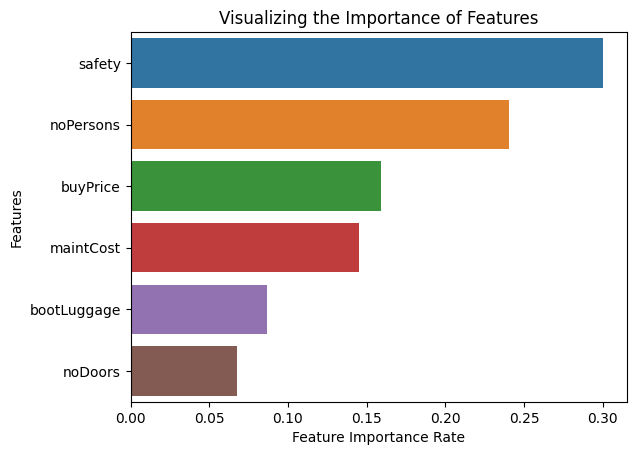

In [22]:
# Creats seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Label the graph
plt.xlabel('Feature Importance Rate')

plt.ylabel('Features')

# Title of the graph
plt.title("Visualizing the Importance of Features")

# Shows the graph
plt.show()